In [3]:
#1 Use pandas to create a Series from the following data:
import pandas as pd

In [4]:
# Name the variable that holds the series fruits.

fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", "gala apple", "honeycrisp apple", "tomato", "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", "mango", "blueberry", "blackberry", "gooseberry", "papaya"]
)

In [5]:
# Run .describe() on the series to see what describe returns for a series of strings.
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [6]:
# Run the code necessary to produce only the unique fruit names.

fruits.unique()

array(['kiwi', 'mango', 'strawberry', 'pineapple', 'gala apple',
       'honeycrisp apple', 'tomato', 'watermelon', 'honeydew',
       'blueberry', 'blackberry', 'gooseberry', 'papaya'], dtype=object)

In [7]:
# Determine how many times each value occurs in the series.
fruits.value_counts()

kiwi                4
mango               2
blackberry          1
watermelon          1
honeydew            1
strawberry          1
tomato              1
honeycrisp apple    1
gooseberry          1
blueberry           1
papaya              1
gala apple          1
pineapple           1
dtype: int64

In [9]:
# Determine the most frequently occurring fruit name from the series.
fruits.value_counts().head(1)

kiwi    4
dtype: int64

In [10]:
# Determine the least frequently occurring fruit name from the series.
fruits.value_counts().tail(1)

pineapple    1
dtype: int64

In [52]:
# Write the code to get the longest string from the fruits series.
fruits.apply(len).sort_values().tail(1)
#which is the last on the series. has the index of 5
fruits[5]



'honeycrisp apple'

In [137]:
spot = fruits.apply(len).idxmax()
fruits[spot]

'honeycrisp apple'

In [41]:
# Capitalize all the fruit strings in the series.
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [53]:
# Count the letter "a" in all the fruits (use string vectorization)
fruits.str.count('a')

0     0
1     1
2     1
3     1
4     3
5     1
6     1
7     1
8     0
9     0
10    0
11    0
12    1
13    0
14    1
15    0
16    3
dtype: int64

In [54]:
# Output the number of vowels in each and every fruit.
def count_vowels(word): 
    x = len([i for i in word if i in 'aeiou']) 
    return x
fruits.apply(count_vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [55]:
# Output the number of vowels in each and every fruit.
#Gonna try a lambda
fruits.apply(lambda x: len([i for i in x if i in 'aeiou']))
#it worked!

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [56]:
# Use the .apply method and a lambda function to find the fruit(s) containing two 
# or more "o" letters in the name.
#this applies the function. Lambda function is a list comprehension of 'o's in a series element
#if they're >1, then it'll return true

fruits.apply(lambda x: len([i for i in x if i=='o'] ) >1)

#applied the boolean mask made by the 
fruits[fruits.apply(lambda x: len([i for i in x if i=='o'] ) >1)]



0     False
1      True
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9     False
10    False
11    False
12     True
13    False
14    False
15     True
16    False
dtype: bool

In [59]:
# Write the code to get only the fruits containing "berry" in the name
fruits[fruits.str.contains('berry')]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [60]:
# Write the code to get only the fruits containing "apple" in the name
fruits[fruits.str.contains('apple')]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [64]:
# Which fruit has the highest amount of vowels?
fruits.apply(lambda x: len([i for i in x if i in 'aeiou'])).sort_values().tail(1)

5    5
dtype: int64

In [65]:
# 2
# Use pandas to create a Series from the following data:
blob = pd.Series(['$796,459.41', '$278.60', '$482,571.67', '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', '$87,231.01', '$1,509,175.45', '$4,138,548.00', '$2,848,913.80', '$594,715.39', '$4,789,988.17', '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', '$769,681.94', '$452,650.23'])

In [66]:
# What is the data type of the series?
blob.dtype
#outputs a 'O', which i guess means 'object', the match for string types.

dtype('O')

In [113]:
# Use series operations to convert the series to a numeric data type.
def remove_commas_and_dollarsign(string_num): 
    x = string_num.replace(',','') 
    x = x.strip("$") 
    return x 

In [116]:
spam = blob.apply(remove_commas_and_dollarsign).astype('float')
print(spam)

0      796459.41
1         278.60
2      482571.67
3     4503915.98
4     2121418.30
5     1260813.30
6       87231.01
7     1509175.45
8     4138548.00
9     2848913.80
10     594715.39
11    4789988.17
12    4513644.50
13    3191059.97
14    1758712.24
15    4338283.54
16    4738303.38
17    2791759.67
18     769681.94
19     452650.23
dtype: float64


In [118]:
# What is the maximum value? The minimum?
spam.max()

4789988.17

In [119]:
#The minimum?
spam.min()

278.6

In [129]:
# Bin the data into 4 equally sized intervals and show how many values fall into each bin.
temp = pd.cut(spam, 4, labels=["bad", "medium", "good", 'excellent'])

In [130]:
temp.value_counts()

bad          7
excellent    6
medium       4
good         3
dtype: int64

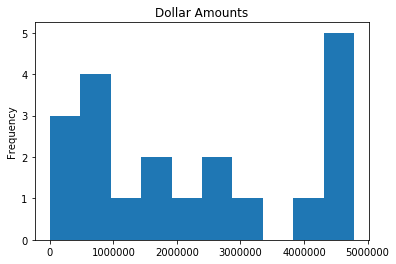

In [179]:
# Plot a histogram of the data. Be sure to include a title and axis labels.
spam.plot(kind='hist', title='Dollar Amounts', )

In [138]:
# 3
# Use pandas to create a Series from the following exam scores:
c = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [141]:
# What is the minimum exam score? The max, mean, median?
#Describe method ought to provide all those answers. Except median.
#Wait, the 50% marker is the median
c.describe()

count    20.000000
mean     78.150000
std      11.352139
min      60.000000
25%      70.500000
50%      79.000000
75%      85.250000
max      96.000000
dtype: float64

In [142]:
c.median()

79.0

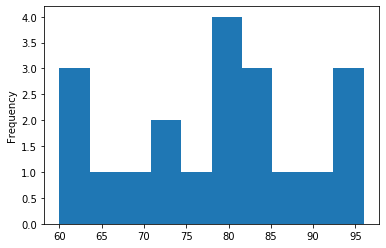

In [164]:
# Plot a histogram of the scores.
c.plot(kind = 'hist')

In [169]:
# Convert each of the numbers above into a letter grade. For example, 86 should be a 'B' 
# and 95 should be an 'A'.
bins = [0, 60, 70, 80, 90, 100]
pd.cut(c,bins,labels=["F", "D", "C", "B", "A"])

0     F
1     B
2     C
3     D
4     A
5     C
6     F
7     B
8     A
9     C
10    D
11    C
12    D
13    B
14    A
15    C
16    B
17    A
18    B
19    C
dtype: category
Categories (5, object): [F < D < C < B < A]

In [176]:
# Write the code necessary to implement a curve. I.e. that grade closest to 100 should be 
# converted to a 100, and that many points should be given to every other score as well.
curve = 100 - c[c.idxmax()]
c + curve

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

In [ ]:
# 4
# Use pandas to create a Series from the following string:

In [145]:
d = pd.Series(list('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy'))

In [149]:
# What is the most frequently occuring letter? 
d.value_counts().idxmax()
#Least frequently occuring?
d.value_counts().idxmin()

'l'

In [158]:
# How many vowels are in the list?
vowels = list('aeiou')
len(d[d.isin(vowels)])

34

In [161]:
# How many consonants are in the list?
len(d)-len(d[d.isin(vowels)])

166

In [162]:
# Create a series that has all of the same letters, but uppercased
d.str.upper()

0      H
1      N
2      V
3      I
4      D
5      D
6      U
7      C
8      K
9      K
10     Q
11     X
12     W
13     Y
14     M
15     B
16     I
17     M
18     K
19     C
20     C
21     E
22     X
23     B
24     K
25     M
26     Q
27     Y
28     G
29     K
      ..
170    G
171    J
172    W
173    U
174    P
175    G
176    Z
177    H
178    I
179    O
180    F
181    O
182    H
183    A
184    W
185    Y
186    T
187    L
188    S
189    I
190    Y
191    E
192    C
193    U
194    P
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

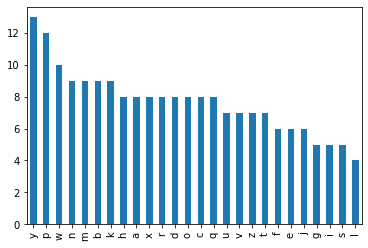

In [182]:
# Create a bar plot of the frequencies of the 6 most frequently occuring letters.
d.value_counts().plot(kind='bar')